# **Data Science Project On Liver Disease Prediction**

# *Business Case*

**Creating predictive model with implementation of  different classifiers on liver patient diseases dataset to predict liver diseases.**

## *Necessary Library*

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#loading dataset

df = pd.read_csv("Indian Liver Patient Dataset (ILPD).csv")
df

,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.9,1
0,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
1,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
2,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
3,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
4,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1
...,...,...,...,...,...,...,...,...,...,...,...
577,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
578,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
579,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
580,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


Here we have numerical column name first we have to rename that columns.

In [ ]:
df.columns = ["Age of the patient", "Gender of the patient", "Total Bilirubin",
              "Direct Bilirubin", "Alkaline Phosphotase", "Aminotransferase",
              "Aspartate Aminotransferase", "Total Protiens", "Albumin",
              "Albumin and Globulin Ratio", "Target"]




In [ ]:
df.head()

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkaline Phosphotase,Aminotransferase,Aspartate Aminotransferase,Total Protiens,Albumin,Albumin and Globulin Ratio,Target
0,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
1,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
2,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
3,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
4,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1


### Introduction

Now a days leading cause of death amongst women and men.Patients with Liver disease have been continuously increasing because of excessive consumption of alcohol, inhale of harmful gases, intake of contaminated food, pickles and drugs.

.This data set contains 416 liver patient records and 167 non liver patient records collected from North East of Andhra Pradesh, India. .The Target column is a class label used to divide groups into liver patients (liver disease) or not (no disease). This data set contains 441 male patient records and 142 female patient records.

# *Domain Analysis*

Target Column = Target




* In this project we are going to analysis the above feature how affect on liver disease.



1.**Age of the patient**:

It contains the age of the patients

2.**Gender of the patient :**


It shows the gender of the patients

3.**Total Bilirubin**:

When bilirubin levels remain high for prolonged periods, it usually means there is severe liver disease and possibly cirrhosis.

It is normal to have some bilirubin in the blood. A normal level is  Total bilirubin: 0.1 to 1.2 mg/dL (1.71 to 20.5 µmol/L)

4.**Direct Bilirubin :**

Direct bilirubin (DB) level increases due to both intrahepatic cholestasis and decreased hepatic bilirubin clearance resulting from portal flow distortion.

Its normal range is less than 0.3 mg/dL (less than 5.1 µmol/L)

5.**Alkaline Phosphotase :**

Alkaline phosphatase (ALP) is an enzyme that’s found throughout your body. ALP blood tests measure the level of ALP in your blood that comes from your liver and bones, and it’s one of the tests included in a comprehensive metabolic panel. High levels of ALP in your blood may indicate liver disease or certain bone disorders.

6.**Aminotransferase :**

Normally, a low level of Aminotransferase exists in the serum. Aminotransferase is increased with liver damage and is used to screen for monitor liver disease.




7.**Aspartate Aminotransferase :**

When liver cells are damaged, AST leaks out into the bloodstream and the level of AST in the blood becomes elevated.

8.**Total Protiens :**

Total protein low levels causes  sign of Liver disease

9.**Albumin :**

with a low serum albumin have an increased risk for reaching kidney failure.

10.**Albumin and Globulin Ratio	:**

Its shows the total ratio of Albumin and Globulin Ratio	.

11. **Target :**

Its shows which patients have liver disease and who don't have liver disease.

Text(0, 0.5, 'Frequency')

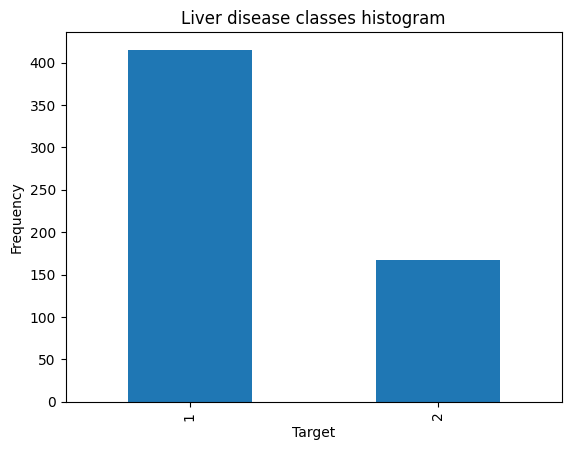

In [ ]:
count_classes = pd.value_counts(df['Target'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Liver disease classes histogram")
plt.xlabel("Target")
plt.ylabel("Frequency")

In [ ]:
df['Target'] = df['Target'].map({2:0,1:1})

In [ ]:
df['Target'].value_counts()

,count
Target,
1,415
0,167


# Basic Checks

In [ ]:
df.head()

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkaline Phosphotase,Aminotransferase,Aspartate Aminotransferase,Total Protiens,Albumin,Albumin and Globulin Ratio,Target
0,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
1,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
2,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
3,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
4,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1


In [ ]:
df.tail ()

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkaline Phosphotase,Aminotransferase,Aspartate Aminotransferase,Total Protiens,Albumin,Albumin and Globulin Ratio,Target
577,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,0
578,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
579,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
580,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
581,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,0


#### Examine the data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582 entries, 0 to 581
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age of the patient          582 non-null    int64  
 1   Gender of the patient       582 non-null    object 
 2   Total Bilirubin             582 non-null    float64
 3   Direct Bilirubin            582 non-null    float64
 4   Alkaline Phosphotase        582 non-null    int64  
 5   Aminotransferase            582 non-null    int64  
 6   Aspartate Aminotransferase  582 non-null    int64  
 7   Total Protiens              582 non-null    float64
 8   Albumin                     582 non-null    float64
 9   Albumin and Globulin Ratio  578 non-null    float64
 10  Target                      582 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.1+ KB


#### Statistical measure of data

In [ ]:
df.describe()

,Age of the patient,Total Bilirubin,Direct Bilirubin,Alkaline Phosphotase,Aminotransferase,Aspartate Aminotransferase,Total Protiens,Albumin,Albumin and Globulin Ratio,Target
count,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,578.000000,582.000000
mean,44.711340,3.303265,1.488488,290.754296,80.824742,110.068729,6.482646,3.141581,0.947145,0.713058
std,16.181921,6.213926,2.810324,243.108929,182.757696,289.141876,1.086306,0.796176,0.319863,0.452723
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000
25%,33.000000,0.800000,0.200000,175.250000,23.000000,25.000000,5.800000,2.600000,0.700000,0.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.940000,1.000000
75%,57.750000,2.600000,1.300000,298.000000,60.750000,87.000000,7.200000,3.800000,1.100000,1.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,1.000000


In [ ]:
df.describe(include = "O")

,Gender of the patient
count,582
unique,2
top,Male
freq,441


# EDA(Exploratary Data Analysis)

In [ ]:
!pip install sweetviz

## *Checking for data Distribution*

In [ ]:
# Univariate analysis
#!pip install sweetviz

In [ ]:
import sweetviz as sv #  library for univariant analysis

my_report = sv.analyze(df)## pass the original dataframe

my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


#### For univariate analysis I used sweetviz .Here we can easily see the total columns analysis

In [ ]:
#bivariate

In [ ]:
data1=df[['Total Bilirubin','Direct Bilirubin','Alkaline Phosphotase','Aminotransferase','Aspartate Aminotransferase' , 'Total Protiens' , 'Albumin' , 'Albumin and Globulin Ratio']]

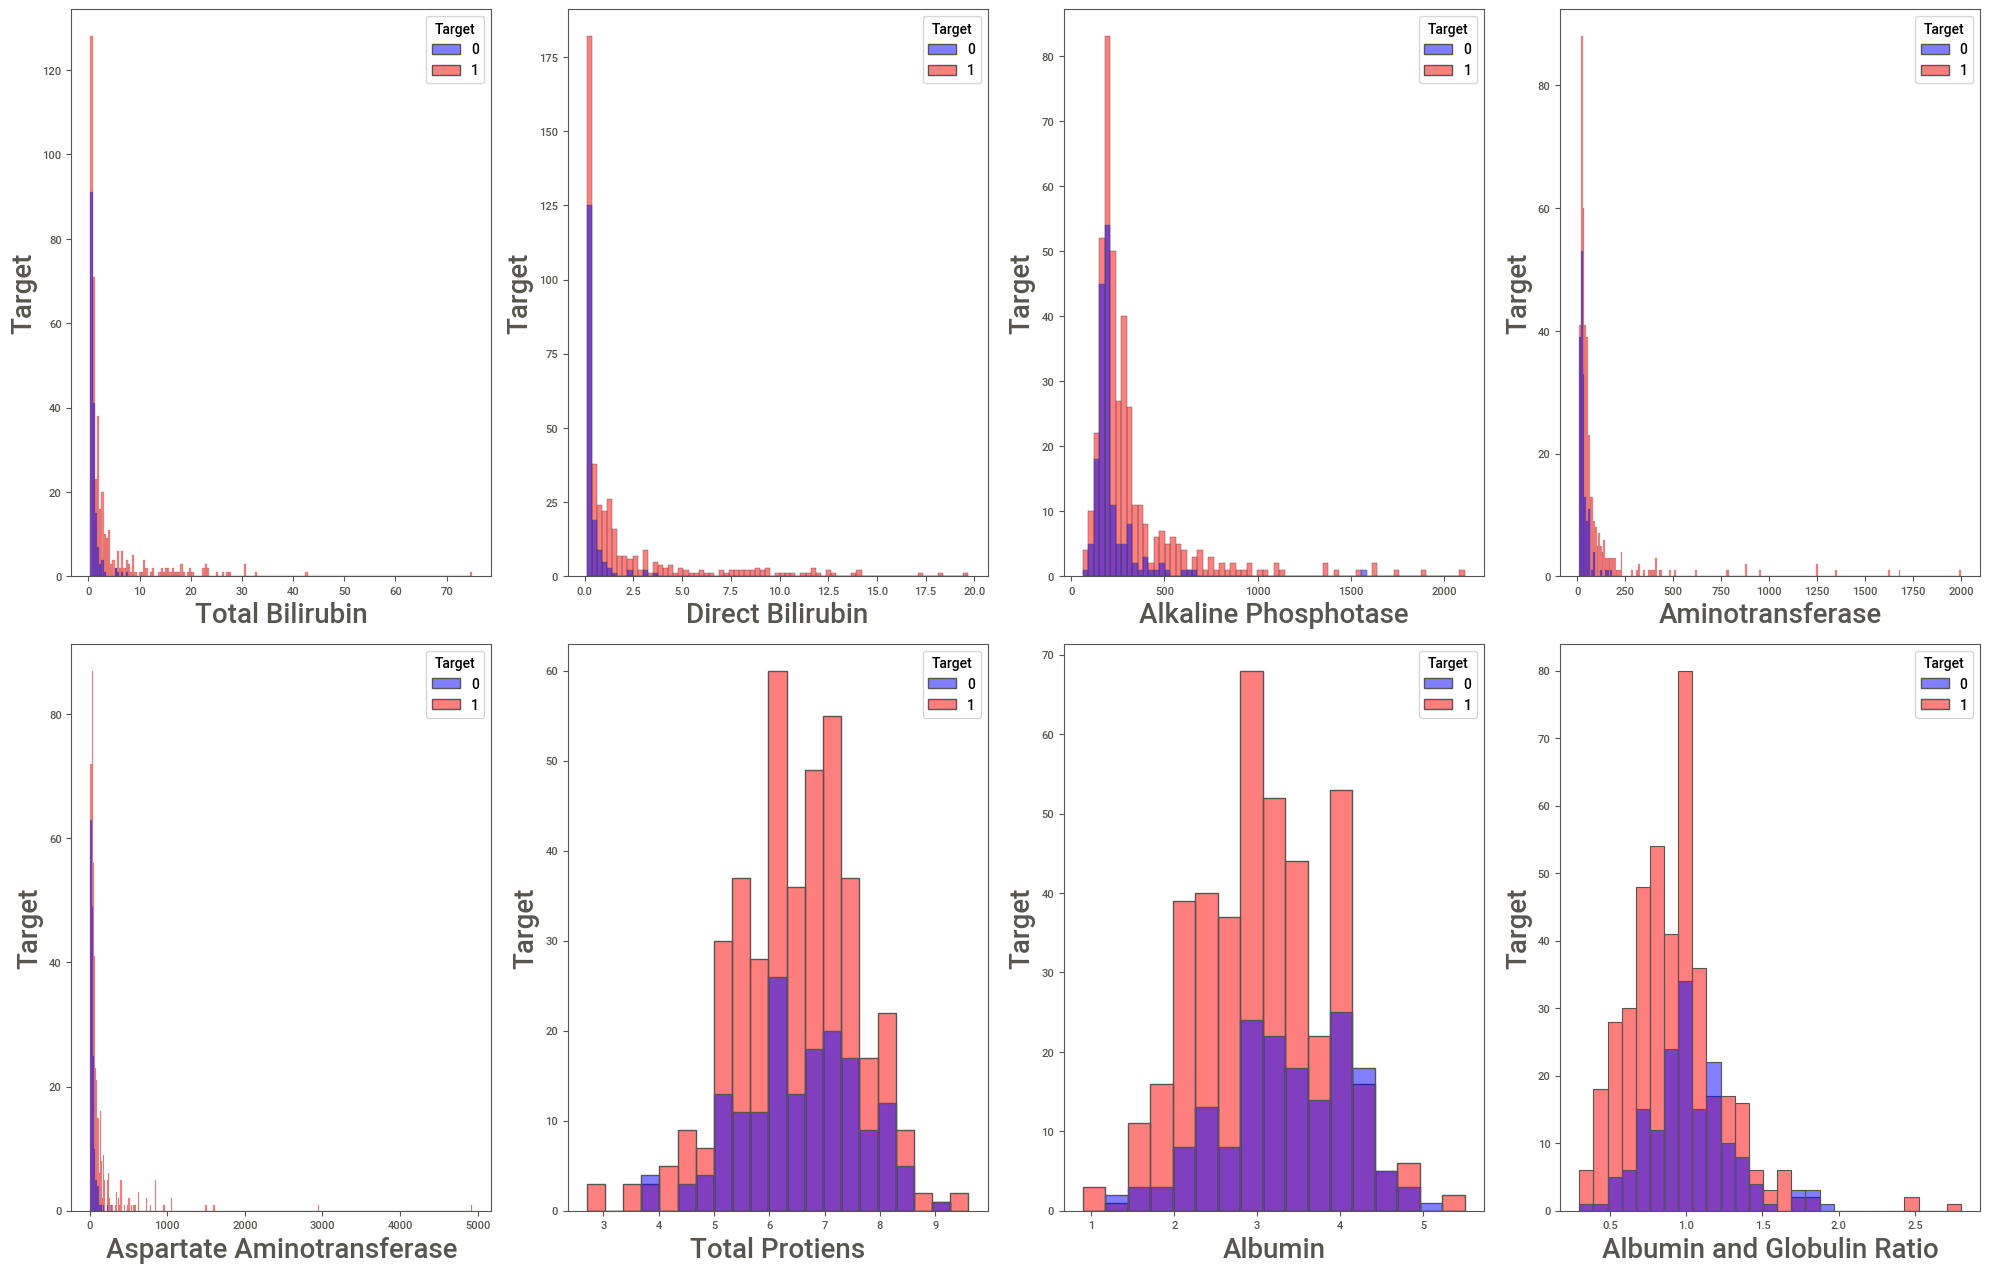

In [ ]:
plt.figure(figsize=(20,25), facecolor='white')#To set canvas
plotnumber = 1#counter

for column in data1:#accessing the columns
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.histplot(x=data1[column],hue=df['Target'],palette=['blue', 'red'])
        plt.xlabel(column,fontsize=20)#assign name to x-axis and set font-20
        plt.ylabel('Target',fontsize=20)
    plotnumber+=1#counter increment
plt.tight_layout()

# *Data Preprocessing*

### *Handling missing value*

In [ ]:
#handling missing value
df.isnull().sum()

,0
Age of the patient,0
Gender of the patient,0
Total Bilirubin,0
Direct Bilirubin,0
Alkaline Phosphotase,0
Aminotransferase,0
Aspartate Aminotransferase,0
Total Protiens,0
Albumin,0
Albumin and Globulin Ratio,4


In [ ]:
df.shape

(582, 11)

In [ ]:
df = df.dropna(how = 'any')
df.head()

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkaline Phosphotase,Aminotransferase,Aspartate Aminotransferase,Total Protiens,Albumin,Albumin and Globulin Ratio,Target
0,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
1,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
2,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
3,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
4,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1


In [ ]:
df.shape

(578, 11)

### *Handling categorical column*

In [ ]:
# handling categorical column
#one hot encoding
df1 = pd.get_dummies(df['Gender of the patient'] ,prefix='Gender of the patient',dtype = int,drop_first=True)

In [ ]:
df=pd.concat([df,df1],axis=1).drop(['Gender of the patient'],axis=1)

In [ ]:
df.head()

,Age of the patient,Total Bilirubin,Direct Bilirubin,Alkaline Phosphotase,Aminotransferase,Aspartate Aminotransferase,Total Protiens,Albumin,Albumin and Globulin Ratio,Target,Gender of the patient_Male
0,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1,1
1,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1,1
2,58,1.0,0.4,182,14,20,6.8,3.4,1.00,1,1
3,72,3.9,2.0,195,27,59,7.3,2.4,0.40,1,1
4,46,1.8,0.7,208,19,14,7.6,4.4,1.30,1,1


### *Handling Outliers*

<Axes: ylabel='Alkaline Phosphotase'>

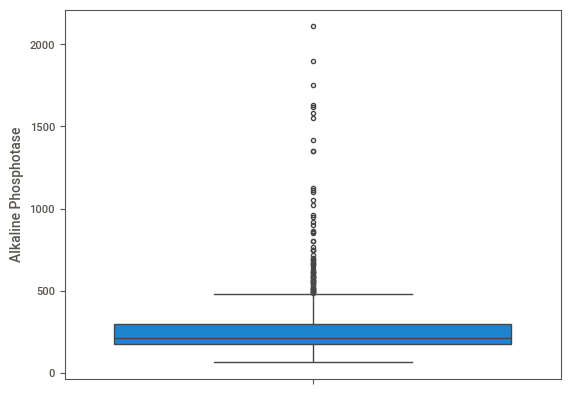

In [ ]:
#checking for outliers
sns.boxplot(df['Alkaline Phosphotase'])

In [ ]:
df.shape

(578, 11)

In [ ]:
df.columns

Index(['Age of the patient', 'Total Bilirubin', 'Direct Bilirubin',
       'Alkaline Phosphotase', 'Aminotransferase',
       'Aspartate Aminotransferase', 'Total Protiens', 'Albumin',
       'Albumin and Globulin Ratio', 'Target', 'Gender of the patient_Male'],
      dtype='object')

<Axes: ylabel='Aspartate Aminotransferase'>

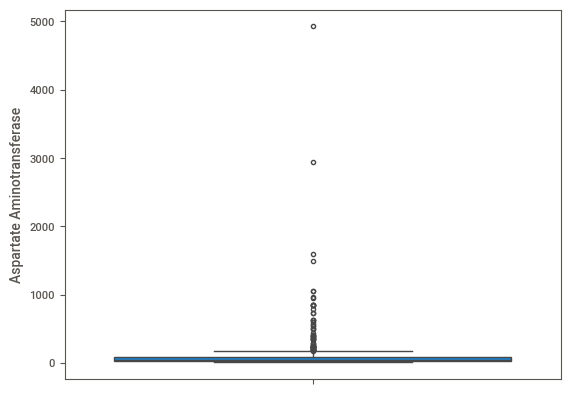

In [ ]:
sns.boxplot(df['Aspartate Aminotransferase'])

<Axes: ylabel='Albumin'>

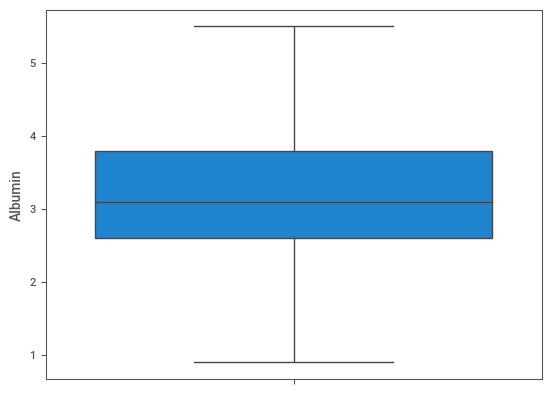

In [ ]:
sns.boxplot(df['Albumin'])

<Axes: ylabel='Total Protiens'>

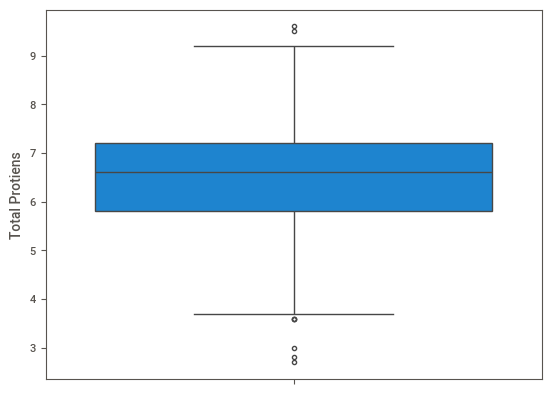

In [ ]:
sns.boxplot(df['Total Protiens'])

In [ ]:
df['Alkaline Phosphotase'].value_counts()

,count
Alkaline Phosphotase,
198,11
298,11
215,11
190,10
195,10
...,...
395,1
97,1
90,1


In [ ]:
df.loc[df['Alkaline Phosphotase'].isnull()==True, 'Alkaline Phosphotase']='11'

In [ ]:
df['Aspartate Aminotransferase'].value_counts()

,count
Aspartate Aminotransferase,
23,16
21,14
20,14
30,14
25,13
...,...
367,1
101,1
168,1


In [ ]:
df.loc[df['Aspartate Aminotransferase'].isnull()==True, 'Aspartate Aminotransferase']='16'

In [ ]:
df['Total Protiens'].value_counts()

,count
Total Protiens,
7.0,32
6.0,30
6.8,27
6.9,25
6.2,24
7.1,22
7.2,21
8.0,20
7.3,18


In [ ]:
df.loc[df['Total Protiens'].isnull()==True, 'Total Protiens']='32'

### *Scalling The dataset*

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
cols=list(df.columns)
data_features_scaled=pd.DataFrame(df)
data_features_scaled[cols]=scaler.fit_transform(df[cols])
data_features_scaled.head()

,Age of the patient,Total Bilirubin,Direct Bilirubin,Alkaline Phosphotase,Aminotransferase,Aspartate Aminotransferase,Total Protiens,Albumin,Albumin and Globulin Ratio,Target,Gender of the patient_Male
0,1.064979,1.217342,1.421734,1.673161,-0.094117,-0.036486,0.939421,0.077750,-0.648168,0.632073,0.562698
1,1.064979,0.639193,0.924557,0.814926,-0.115956,-0.146897,0.478404,0.203630,-0.178810,0.632073,0.562698
2,0.818065,-0.372568,-0.389410,-0.449841,-0.367098,-0.312515,0.293998,0.329510,0.165385,0.632073,0.562698
3,1.682266,0.093163,0.178792,-0.396458,-0.296123,-0.177950,0.755014,-0.929292,-1.712044,0.632073,0.562698
4,0.077321,-0.244091,-0.282872,-0.343075,-0.339800,-0.333217,1.031624,1.588312,1.104099,0.632073,0.562698


# *Feature Selection*

### *checking duplicate value*

In [ ]:
df.duplicated().sum()

13

In [ ]:
df = df.drop_duplicates()

### *Checking coreletion*

In [ ]:
df.corr()

,Age of the patient,Total Bilirubin,Direct Bilirubin,Alkaline Phosphotase,Aminotransferase,Aspartate Aminotransferase,Total Protiens,Albumin,Albumin and Globulin Ratio,Target,Gender of the patient_Male
Age of the patient,1.000000,0.011641,0.007364,0.081148,-0.083669,-0.016686,-0.196788,-0.270248,-0.215934,0.132662,0.061650
Total Bilirubin,0.011641,1.000000,0.873933,0.205032,0.216572,0.237990,-0.008216,-0.223877,-0.207889,0.225053,0.088014
Direct Bilirubin,0.007364,0.873933,1.000000,0.233365,0.236499,0.257767,-0.000489,-0.230538,-0.201698,0.251624,0.099198
Alkaline Phosphotase,0.081148,0.205032,0.233365,1.000000,0.125683,0.166412,-0.028416,-0.166172,-0.236408,0.186635,-0.026295
Aminotransferase,-0.083669,0.216572,0.236499,0.125683,1.000000,0.791714,-0.034935,-0.026773,-0.006620,0.162087,0.082473
Aspartate Aminotransferase,-0.016686,0.237990,0.257767,0.166412,0.791714,1.000000,-0.021961,-0.084723,-0.072991,0.151429,0.079837
Total Protiens,-0.196788,-0.008216,-0.000489,-0.028416,-0.034935,-0.021961,1.000000,0.783785,0.234671,-0.036773,-0.091432
Albumin,-0.270248,-0.223877,-0.230538,-0.166172,-0.026773,-0.084723,0.783785,1.000000,0.687526,-0.165555,-0.092860
Albumin and Globulin Ratio,-0.215934,-0.207889,-0.201698,-0.236408,-0.006620,-0.072991,0.234671,0.687526,1.000000,-0.171298,-0.006097
Target,0.132662,0.225053,0.251624,0.186635,0.162087,0.151429,-0.036773,-0.165555,-0.171298,1.000000,0.079616


<Axes: >

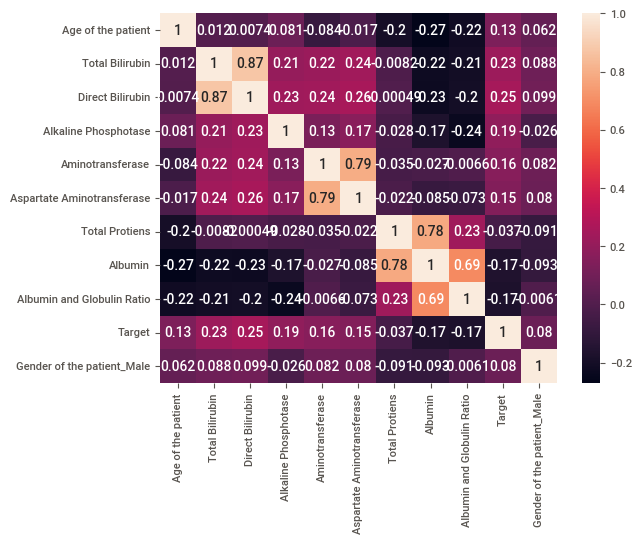

In [ ]:
sns.heatmap(df.corr() , annot = True)

# Model Creation

### HERE WE WILL BE EXPERIMENTING WITH FOUR ALGORITHM

1.Logistic Regression

2.Random Forest Classifier

3.Desicion tree Classifier

4.Support Vector Classifier

In [ ]:
x = df.drop('Target' , axis  = 1)
y = df.Target

In [ ]:
from sklearn.model_selection import train_test_split,cross_val_score , GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix , classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2 ,random_state = 0)

In [ ]:
train_mean = x_train.mean()
train_std = x_train.std()

In [ ]:
x_train = (x_train- train_mean) / train_std

In [ ]:
x_train.describe()

,Age of the patient,Total Bilirubin,Direct Bilirubin,Alkaline Phosphotase,Aminotransferase,Aspartate Aminotransferase,Total Protiens,Albumin,Albumin and Globulin Ratio,Gender of the patient_Male
count,452.000000,452.00000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.0000
unique,70.000000,99.00000,71.000000,228.000000,141.000000,160.000000,58.000000,40.000000,61.000000,2.0000
top,0.941946,-0.38942,-0.455417,-0.303703,-0.298466,-0.363853,0.450135,-0.200882,0.141659,0.5631
freq,29.000000,74.00000,157.000000,10.000000,21.000000,14.000000,26.000000,34.000000,90.000000,343.0000


In [ ]:
x_test = (x_test - train_mean) / train_std

In [ ]:
x_test.describe()

,Age of the patient,Total Bilirubin,Direct Bilirubin,Alkaline Phosphotase,Aminotransferase,Aspartate Aminotransferase,Total Protiens,Albumin,Albumin and Globulin Ratio,Gender of the patient_Male
count,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.0000
unique,47.000000,48.000000,35.000000,90.000000,63.000000,71.000000,39.000000,30.000000,26.000000,2.0000
top,0.202352,-0.405681,-0.455417,-0.376475,-0.324782,-0.350355,0.270953,-0.200882,-0.497042,0.5631
freq,7.000000,15.000000,33.000000,4.000000,5.000000,5.000000,8.000000,10.000000,18.000000,85.0000


## Logistic regression

In [ ]:
#Logistic regression

lr = LogisticRegression()
lr.fit(x_train,y_train)


LogisticRegression()

## Testing Accuracy

In [ ]:
y_pred = lr.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1])

In [ ]:
print(accuracy_score(y_test , y_pred))
print(confusion_matrix(y_test , y_pred))
print(classification_report(y_test , y_pred))

0.7699115044247787
[[ 8 22]
 [ 4 79]]
              precision    recall  f1-score   support

           0       0.67      0.27      0.38        30
           1       0.78      0.95      0.86        83

    accuracy                           0.77       113
   macro avg       0.72      0.61      0.62       113
weighted avg       0.75      0.77      0.73       113



In [ ]:
lr_f1_score = f1_score(y_pred , y_test)
print('f1_score' ,lr_f1_score*100)

f1_score 85.86956521739131


## SVM

In [ ]:
from sklearn.svm import SVC
svclassifier = SVC() ## base model with default parameters
svclassifier.fit(x_train, y_train)

SVC()

In [ ]:
y_pred1 = svclassifier.predict(x_test)
y_pred1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1])

## Testing Accuracy

In [ ]:
print(accuracy_score(y_test,y_pred1))

0.7256637168141593


In [ ]:
f1=f1_score(y_test,y_pred1)
f1

0.841025641025641

## Hyperparameter tunning

In [ ]:
param_grid = {'C': [0.1, 5, 10,50,60,70],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
             'random_state':(list(range(1, 20)))}
model=SVC()
grid = GridSearchCV(model, param_grid, refit = True, verbose = 2,scoring='f1',cv=5)

# fitting the model for grid search
grid.fit(x,y)

Fitting 5 folds for each of 570 candidates, totalling 2850 fits
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.1s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.1s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.1s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.1s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=3; total time=   0.1s
[CV] END .....................C=0.1, gamma=1,

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 5, 10, 50, 60, 70],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'random_state': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19]},
             scoring='f1', verbose=2)

In [ ]:
print(grid.best_params_)

{'C': 0.1, 'gamma': 1, 'random_state': 1}


In [ ]:
clf=SVC(C=0.1, gamma=1,random_state=1) ##0.1

In [ ]:
clf.fit(x_train, y_train)

SVC(C=0.1, gamma=1, random_state=1)

In [ ]:
y_clf = clf.predict(x_test)
y_clf

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1])

In [ ]:
f1=f1_score(y_test,y_clf)
f1

0.8469387755102041

## Decision tree

In [ ]:
# Decision tree
dt = DecisionTreeClassifier(random_state=42)
dt



DecisionTreeClassifier(random_state=42)

In [ ]:
dt.fit(x_train, y_train)


DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred2 = dt.predict(x_test)
y_pred2

array([1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1])

### Testing Accuracy

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred2))
print("Classification Report:")
print(classification_report(y_test, y_pred2))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred2))



Accuracy: 0.6194690265486725
Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.43      0.38        30
           1       0.77      0.69      0.73        83

    accuracy                           0.62       113
   macro avg       0.55      0.56      0.55       113
weighted avg       0.65      0.62      0.63       113

Confusion Matrix:
[[13 17]
 [26 57]]


### Hypertunning Tunning

In [ ]:
param_grid = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)

# Perform grid search
grid_search.fit(x_train, y_train)

# Print best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)




Best Parameters: {'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 2}
Best Score: 0.7037118437118437


In [ ]:
dec_f1_score = f1_score(y_pred2 , y_test)
print('f1_score' ,dec_f1_score*100)

f1_score 72.61146496815286


## Random forest

In [ ]:
rf = RandomForestClassifier(criterion='entropy' ,max_depth = 15, min_samples_split=3,min_samples_leaf=1,n_estimators=100, random_state=42)

# Train model
rf.fit(x_train, y_train)

# Make predictions
y_pred3 = rf.predict(x_test)
y_pred3



array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1])

### Testing Accuracy

In [ ]:
# Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred3))
print("Classification Report:")
print(classification_report(y_test, y_pred3))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred3))



Accuracy: 0.7522123893805309
Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.50      0.52        30
           1       0.82      0.84      0.83        83

    accuracy                           0.75       113
   macro avg       0.68      0.67      0.68       113
weighted avg       0.75      0.75      0.75       113

Confusion Matrix:
[[15 15]
 [13 70]]


### Hyperparameter tunning

In [ ]:
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)

# Perform grid search
grid_search.fit(x_train, y_train)

# Print best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 0.7146520146520148


In [ ]:
ran_f1_score = f1_score(y_pred3 , y_test)
print('f1_score' ,ran_f1_score*100)

f1_score 83.33333333333334


## Observation

### . From the above models we don't get much more accuracy  but logistic Regression perform very well with f1_score 85.86
### Decision tree not perform well because it have only 72% accuracy.




Save Model

In [ ]:
import pickle

file = open('liver_dise_pred.pkl','wb')
pickle.dump(model,file)

Task 3

This project is based on binary classification.Here we will get 0 and 1 values.In classification type problem  we use logistics regression,random forest,decision tree.This type of supervised machine learning algorithm that accomplishes binary classificatiion tasks by predicting the probability of an outcome,event, or observation.

there are various type of classifiers algorithum

* linear classifiers  
* Non-linear classifiers

In this project,we use non-linear classifier which can capture more complex relationships between the input features and the target variable.
